# ANÁLISE DE FRAUDE EM CARTÃO DE CRÉDITO

### IMPORTANTO BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
#VERIFICANDO DADOS FALTANTES
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

O dataset apresenta dados completos

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Abaixo vamos analisar como se encontra o balanço de dados para a "Class" na qual Class=1 indica fraude e Class=0 indica não-fraude

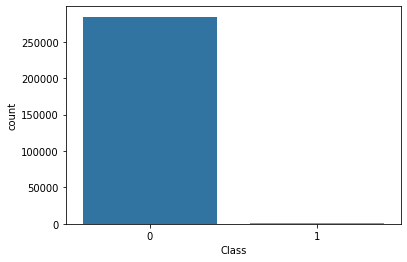

In [6]:
sns.countplot(data=df, x='Class')

Os dados se encontram desbalanceados

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
porc_fraud=(492/284315)*100

In [9]:
porc_fraud

0.17304750013189596

Apenas 0,17% dos dados tem confirmação de fraude

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Vamos agora verificar como se comporta as variáveis "Amount" e "Time" para as fraudes e não fraudes

In [11]:
#separando em 2 dataframes
df_0=df[df['Class']==0]

df_1=df[df['Class']==1]

In [12]:
#media de Amount para não fraude
df_0['Amount'].mean()

88.29102242225574

In [13]:
#media de Amount para fraude
df_1['Amount'].mean()

122.21132113821133

In [14]:
df_0['Time'].mean()

94838.20225805884

In [15]:
df_1['Time'].mean()

80746.80691056911

Text(0.5, 1.0, 'Time')

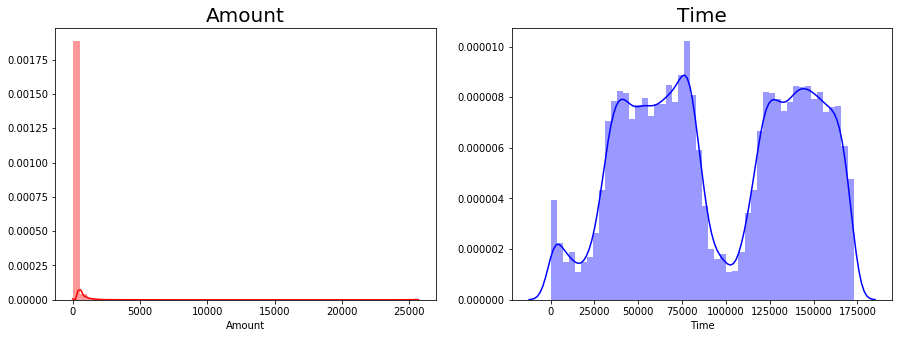

In [16]:
fig, axes=plt.subplots(1,2,figsize=(15,5))

sns.distplot(df_0['Amount'],ax=axes[0],color='r',bins=50)

axes[0].set_title('Amount',fontsize=20)

sns.distplot(df_0['Time'],ax=axes[1],color='b',bins=50)

axes[1].set_title('Time',fontsize=20)
    





Text(0.5, 1.0, 'Time')

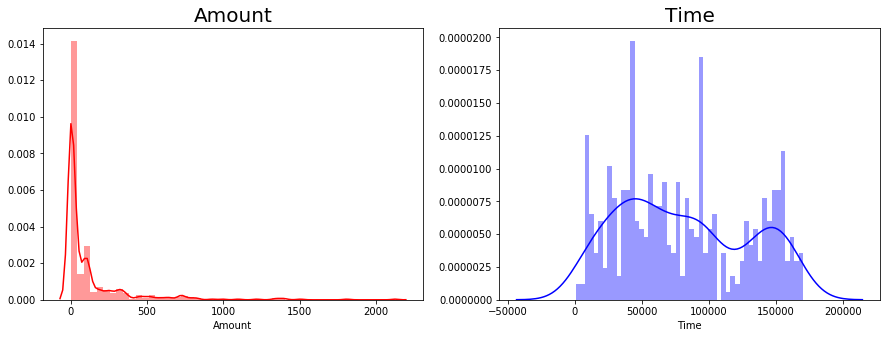

In [17]:
fig, axes=plt.subplots(1,2,figsize=(15,5))

sns.distplot(df_1['Amount'],ax=axes[0],color='r',bins=50)

axes[0].set_title('Amount',fontsize=20)

sns.distplot(df_1['Time'],ax=axes[1],color='b',bins=50)

axes[1].set_title('Time',fontsize=20)
    





Text(0.5, 1.0, 'Time')

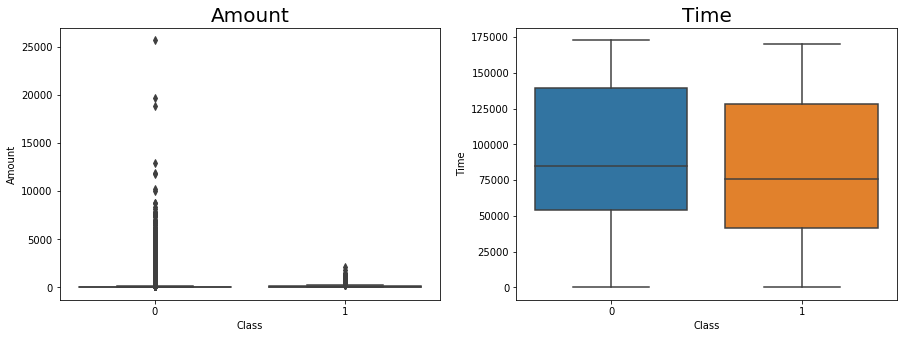

In [18]:
fig, axes=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df,x='Class',y='Amount',ax=axes[0])
axes[0].set_title('Amount',fontsize=20)

sns.boxplot(data=df,x='Class',y='Time',ax=axes[1])
axes[1].set_title('Time',fontsize=20)

As médias e distribuições das variáveis "Time" e "Amount" são um pouco diferentes para fraudes e não fraudes. 

Vamos agora balancear os dados para que possa analisar melhor como as variáveis se relacionam com os casos de fraude

In [19]:
#embaralha os dados 
df_random = df.sample(frac=1)

In [20]:
df_fraude=df_random[df_random['Class']==1]
df_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14338,25426.0,1.125336,1.130146,-0.962975,2.675688,0.990075,-0.243318,0.316192,0.122960,-1.143343,...,-0.166737,-0.521934,-0.112376,-0.592077,0.520791,0.043354,0.015159,0.063612,3.76,1
229712,146022.0,0.908637,2.849024,-5.647343,6.009415,0.216656,-2.397014,-1.819308,0.338527,-2.819883,...,0.407260,-0.397435,-0.080006,-0.168597,0.465058,0.210510,0.648705,0.360224,1.18,1
243547,151972.0,-6.618211,3.835943,-6.316453,1.844111,-2.476892,-1.886718,-3.817495,0.613470,-1.482121,...,1.636622,0.038727,0.278218,0.786670,0.063895,0.154707,-2.042403,1.405141,57.73,1
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
243749,152058.0,-3.576362,3.299436,-7.460433,7.783634,-0.398549,-1.968441,-3.110476,-0.328404,-1.574363,...,0.540731,0.719526,0.379249,-0.616962,-0.442811,0.359841,-2.651825,0.422184,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191267,129186.0,0.290155,0.049243,-0.740524,2.865463,1.395294,-0.535163,0.142543,-0.222770,-1.463691,...,0.337349,1.018191,0.303550,0.833886,-1.222306,2.745261,-0.220402,0.168233,7.18,1
153835,100298.0,-22.341889,15.536133,-22.865228,7.043374,-14.183129,-0.463145,-28.215112,-14.607791,-9.481456,...,-9.110423,4.158895,1.412928,0.382801,0.447154,-0.632816,-4.380154,-0.467863,1.00,1
141259,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
149357,91075.0,-1.855061,1.554964,-1.405809,0.669327,-0.280230,1.178652,-3.459979,-2.815155,1.242229,...,-0.095308,0.946629,-0.297403,-0.368344,0.198731,-0.078591,0.366709,0.073767,38.76,1


In [21]:
# Separa os casos de não fraude e trunca o número de linhas a 492 igual a quantidade de linhas dos dados de fraude
df_nofraude=df_random.loc[df_random['Class']==0][:492]
df_nofraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
212648,138943.0,-0.443013,1.644262,1.617412,4.508178,-0.342445,0.949778,-0.286229,0.656840,-1.617771,...,0.345042,1.198269,-0.081243,-0.045942,-0.620866,0.509352,0.377892,0.207894,19.89,0
43247,41432.0,-1.575409,-0.832156,1.878101,-2.493705,-0.833513,0.010800,-1.210692,0.756742,-2.626063,...,0.041491,0.139152,-0.094235,-0.306946,0.256628,-0.279728,0.216258,-0.051653,50.00,0
65253,51500.0,1.157498,0.246188,0.379704,0.576909,-0.246463,-0.400356,-0.107223,0.082822,-0.208214,...,-0.198253,-0.584958,0.175196,0.177340,0.078250,0.094970,-0.011548,0.018618,0.89,0
131034,79486.0,1.221085,0.181695,0.206761,0.012758,-0.321872,-1.094403,0.291061,-0.233534,-0.465226,...,-0.362359,-1.121047,0.201364,0.566153,0.065789,0.588570,-0.101419,-0.000677,18.94,0
17012,28362.0,-3.933943,0.724052,1.607258,1.113176,-0.742031,2.597860,-0.676630,-4.939324,1.008837,...,0.187439,0.964716,-0.058422,-0.259204,-0.060946,-0.239245,-2.058525,0.571610,182.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181654,125067.0,1.986611,-0.584883,-1.782703,0.549666,0.096854,-0.371031,0.087008,-0.155062,-0.987729,...,-0.238495,-0.249578,0.064509,0.642459,0.278236,-0.544417,-0.015199,-0.051534,69.97,0
104643,69164.0,-2.390858,1.473961,0.847362,-0.194439,-0.589593,2.419291,-0.923534,1.974842,-0.136304,...,0.074414,0.395559,-0.127512,-1.728104,0.174920,0.544805,0.059869,-0.084331,89.40,0
119042,75309.0,1.508368,-1.072074,0.825142,-1.315600,-1.860102,-0.819573,-1.272799,-0.129711,-1.564684,...,-0.065878,0.228266,0.006438,0.371739,0.335230,-0.101951,0.051646,0.025906,7.00,0
237,158.0,-0.600816,0.922455,-0.135952,-1.259915,2.439824,3.330205,0.087107,0.949659,-0.327932,...,-0.311489,-0.927233,-0.045268,0.979587,0.016423,0.091043,0.371280,0.180187,1.79,0


Analisamos novamente a distribuição das variáveis "Time" e "Amount" para os dados balanceados 

Text(0.5, 1.0, 'Time')

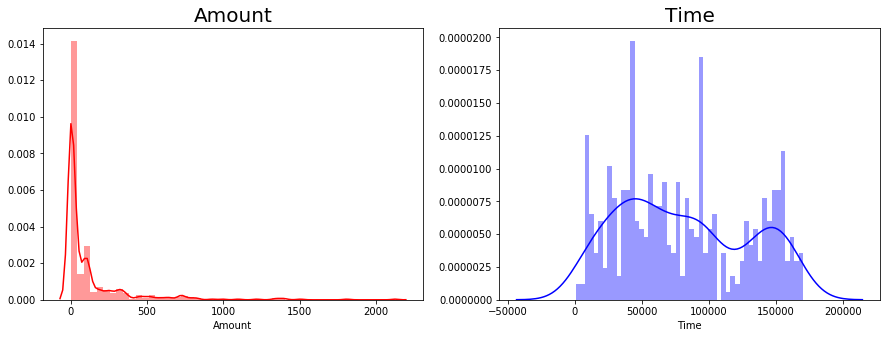

In [22]:
fig, axes=plt.subplots(1,2,figsize=(15,5))

sns.distplot(df_fraude['Amount'],ax=axes[0],color='r',bins=50)

axes[0].set_title('Amount',fontsize=20)

sns.distplot(df_fraude['Time'],ax=axes[1],color='b',bins=50)

axes[1].set_title('Time',fontsize=20)
    

Text(0.5, 1.0, 'Time')

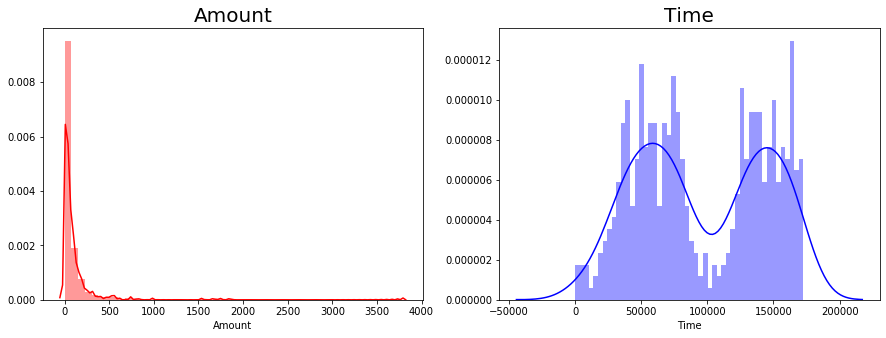

In [23]:
fig, axes=plt.subplots(1,2,figsize=(15,5))

sns.distplot(df_nofraude['Amount'],ax=axes[0],color='r',bins=50)

axes[0].set_title('Amount',fontsize=20)

sns.distplot(df_nofraude['Time'],ax=axes[1],color='b',bins=50)

axes[1].set_title('Time',fontsize=20)

Vamos agora juntar os dados de não frade e fraude em um único dataframe

In [24]:
df_final = pd.concat([df_fraude,df_nofraude])

In [25]:
df_final

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14338,25426.0,1.125336,1.130146,-0.962975,2.675688,0.990075,-0.243318,0.316192,0.122960,-1.143343,...,-0.166737,-0.521934,-0.112376,-0.592077,0.520791,0.043354,0.015159,0.063612,3.76,1
229712,146022.0,0.908637,2.849024,-5.647343,6.009415,0.216656,-2.397014,-1.819308,0.338527,-2.819883,...,0.407260,-0.397435,-0.080006,-0.168597,0.465058,0.210510,0.648705,0.360224,1.18,1
243547,151972.0,-6.618211,3.835943,-6.316453,1.844111,-2.476892,-1.886718,-3.817495,0.613470,-1.482121,...,1.636622,0.038727,0.278218,0.786670,0.063895,0.154707,-2.042403,1.405141,57.73,1
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
243749,152058.0,-3.576362,3.299436,-7.460433,7.783634,-0.398549,-1.968441,-3.110476,-0.328404,-1.574363,...,0.540731,0.719526,0.379249,-0.616962,-0.442811,0.359841,-2.651825,0.422184,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181654,125067.0,1.986611,-0.584883,-1.782703,0.549666,0.096854,-0.371031,0.087008,-0.155062,-0.987729,...,-0.238495,-0.249578,0.064509,0.642459,0.278236,-0.544417,-0.015199,-0.051534,69.97,0
104643,69164.0,-2.390858,1.473961,0.847362,-0.194439,-0.589593,2.419291,-0.923534,1.974842,-0.136304,...,0.074414,0.395559,-0.127512,-1.728104,0.174920,0.544805,0.059869,-0.084331,89.40,0
119042,75309.0,1.508368,-1.072074,0.825142,-1.315600,-1.860102,-0.819573,-1.272799,-0.129711,-1.564684,...,-0.065878,0.228266,0.006438,0.371739,0.335230,-0.101951,0.051646,0.025906,7.00,0
237,158.0,-0.600816,0.922455,-0.135952,-1.259915,2.439824,3.330205,0.087107,0.949659,-0.327932,...,-0.311489,-0.927233,-0.045268,0.979587,0.016423,0.091043,0.371280,0.180187,1.79,0


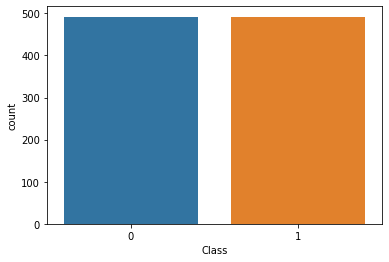

In [26]:
sns.countplot(data=df_final,x='Class')

Pelo gráfico acima tem-se que o dataframe fico equilibrado entre dados de fraude e não fraude

O próximo passo é entender a relação das outras características (V1 até V28) com  "Class". Para isso vamos analinar a correlação entre essas variáveis em um mapa de calor

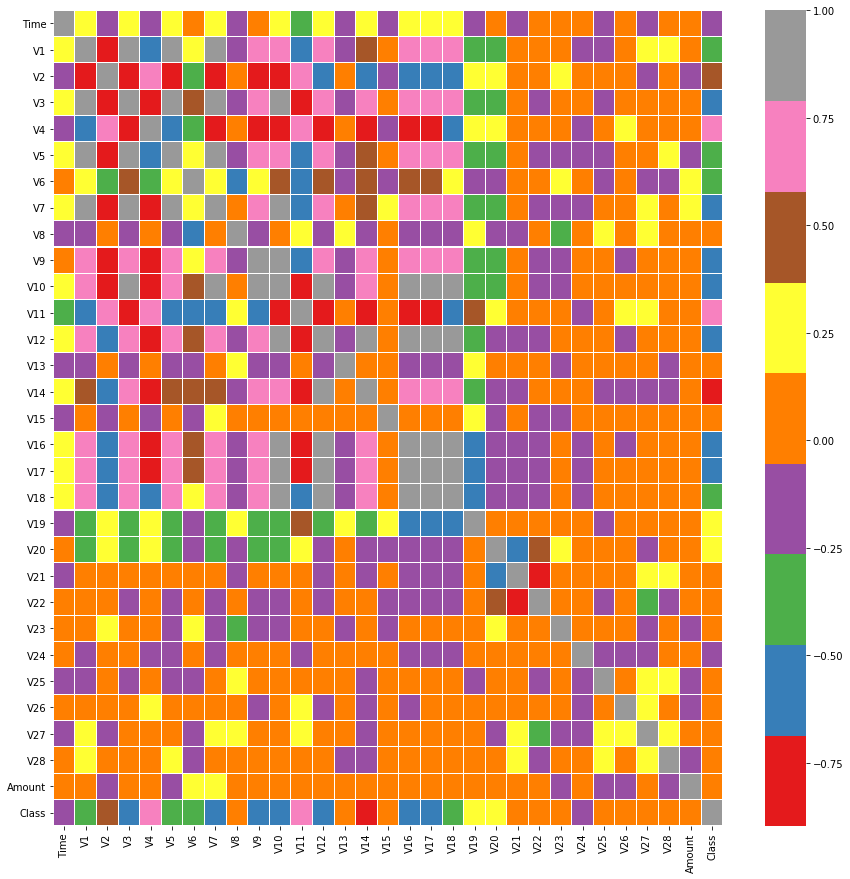

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(df_final.corr(),cmap='Set1',linewidths=0.1)

Pelo mapa de calor acima tem-se que as variáveis V17,V16,V14,V12, V10,V9 e V3 apresentam uma correlação negativa forte com a coluna "Class".
Já as variáveis V4, V11 e V2 apresentam uma correlação positiva em relação a "Class"

Para um olhar mais atento vamos, agora, por meio de gráficos de caixa verificar como os valores dos dados são distribuidos para cada tipo de "Class", ou seja, para fraudes e não fraudes:

Text(0.5, 1.0, 'V12')

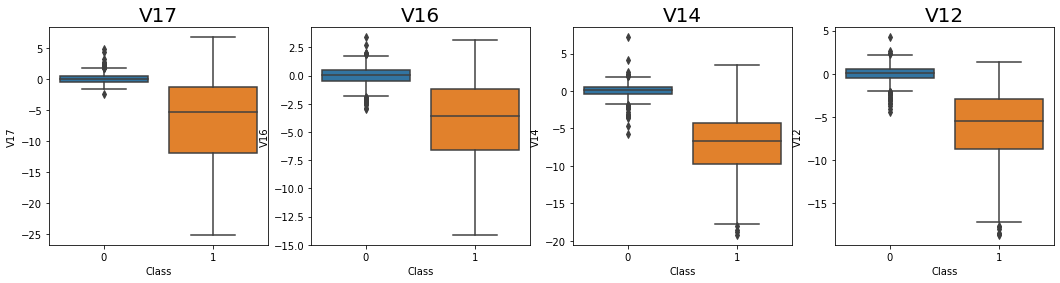

In [28]:
fig, ax=plt.subplots(nrows=1, ncols=4,figsize=(18,4))

sns.boxplot(x='Class',y='V17', data=df_final,ax=ax[0])
ax[0].set_title('V17',fontsize=20)

sns.boxplot(x='Class',y='V16', data=df_final,ax=ax[1])
ax[1].set_title('V16',fontsize=20)

sns.boxplot(x='Class',y='V14', data=df_final,ax=ax[2])
ax[2].set_title('V14',fontsize=20)

sns.boxplot(x='Class',y='V12', data=df_final,ax=ax[3])
ax[3].set_title('V12',fontsize=20)


Text(0.5, 1.0, 'V3')

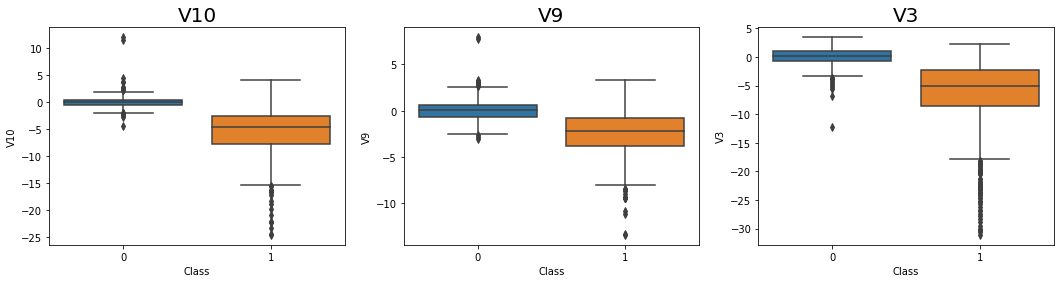

In [29]:
fig, ax=plt.subplots(nrows=1, ncols=3,figsize=(18,4))
sns.boxplot(x='Class',y='V10', data=df_final,ax=ax[0])
ax[0].set_title('V10',fontsize=20)

sns.boxplot(x='Class',y='V9', data=df_final,ax=ax[1])
ax[1].set_title('V9',fontsize=20)

sns.boxplot(x='Class',y='V3', data=df_final,ax=ax[2])
ax[2].set_title('V3',fontsize=20)

Text(0.5, 1.0, 'V2')

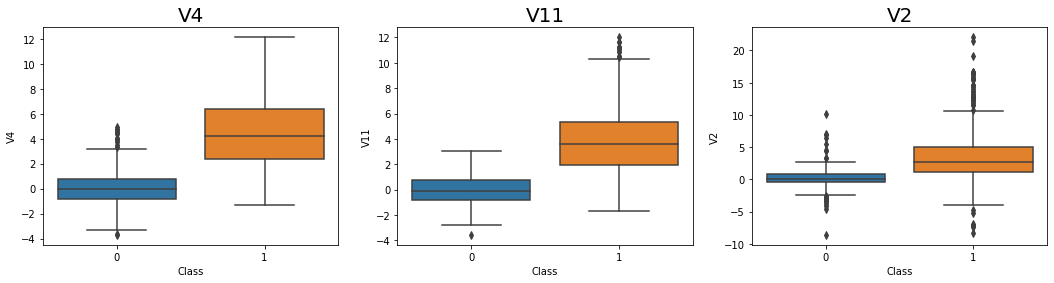

In [30]:
fig, ax=plt.subplots(nrows=1, ncols=3,figsize=(18,4))


sns.boxplot(x='Class',y='V4', data=df_final,ax=ax[0])
ax[0].set_title('V4',fontsize=20)

sns.boxplot(x='Class',y='V11', data=df_final,ax=ax[1])
ax[1].set_title('V11',fontsize=20)

sns.boxplot(x='Class',y='V2', data=df_final,ax=ax[2])
ax[2].set_title('V2',fontsize=20)


De fato pela distribuição dos dados pelos gráficos acima podemos concluir que as variáveis  V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2 apresentam uma relação mais forte com as fraudes de cartões de crédito indicados pela coluna "Class". Para confirmar, vamos plotar mais um gráfico de caixa para verificarmos como uma variável que apresentou baixa correlação com a coluna "Class" no mapa de calor não apresenta uma grande diferença na distribuição dos dados para fraude e não-fraude 

Text(0.5, 1.0, 'V15')

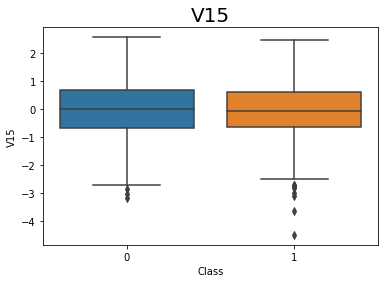

In [31]:

sns.boxplot(x='Class',y='V15', data=df_final)
plt.title('V15',fontsize=20)

## CONCLUSÃO

Pela análise acima observamos que as variáveis V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2 são mais determinantes para se prever os causos de fraude do que as outras. Assim devemos escolher um modelo de classificação supervisionado que consiga interpretar essas informações e realizar a previsão com qualidade

## Construindo modelos para realizar previsões


Existem varios modelos de aprendizagem supervisionada que podem ser implementados e testados neste desafio. Escolhermos 2 deles: Regressão Logistica e Florestas Aleatórias. 

### Divisão treino-teste
Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de testes:

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x=df_final.drop('Class',axis=1)
y=df_final['Class']

In [34]:
x.shape

(984, 30)

In [35]:
y.shape

(984,)

In [36]:
#redefine o indice
#df_final.index = range(984 )

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=40)

### Treinando o modelo de Regressão Logistica

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
predictions = logmodel.predict(X_test)

### Avaliando os resultados:

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        99
           1       0.97      0.92      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



Conseguimos uma precisão em torno de 93%, sendo este um resultado muito bom. 

O próximo passo é verificar o modelo de Florestas Aleatórias.

### Treinando o modelo de Floestas aleatórias

In [43]:

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=30)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
rfc_pred=rfc.predict(X_test)

In [45]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.98      0.92      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



Pode-se observar que os dois modelos apresentaram resultados bastante semelhantes.

Para tentar melhorar o resultado ainda mais podemos retirar alguns outliers e treinarmos novamente os modelos sem esses outliers para que possamos comparar os resultados

### Removendo outliers

In [46]:
#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V17'].loc[df_final['Class'] == 1].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V17 Lower: {}'.format(v_lower))
print('V17 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V17 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V17 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V17'] > v_upper) | (df_final['V17'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V16'].loc[df_final['Class'] == 1].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V16 Lower: {}'.format(v_lower))
print('V16 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V16 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V16 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V16'] > v_upper) | (df_final['V16'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V14'].loc[df_final['Class'] == 1].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V14 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V14'] > v_upper) | (df_final['V14'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V12'].loc[df_final['Class'] == 1].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V12 Lower: {}'.format(v_lower))
print('V12 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V12 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V12 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V12'] > v_upper) | (df_final['V12'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V10'].loc[df_final['Class'] == 1].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V10 Lower: {}'.format(v_lower))
print('V10 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V10 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V10'] > v_upper) | (df_final['V10'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V9'].loc[df_final['Class'] == 1].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V9 Lower: {}'.format(v_lower))
print('V9 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V9 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V9 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V9'] > v_upper) | (df_final['V9'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V3'].loc[df_final['Class'] == 1].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V3 Lower: {}'.format(v_lower))
print('V3 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V3 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V3 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V3'] > v_upper) | (df_final['V3'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V4'].loc[df_final['Class'] == 1].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V4 Lower: {}'.format(v_lower))
print('V4 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V4 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V4 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V4'] > v_upper) | (df_final['V4'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V11'].loc[df_final['Class'] == 1].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V17 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V11'] > v_upper) | (df_final['V11'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V2'].loc[df_final['Class'] == 1].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V2 Lower: {}'.format(v_lower))
print('V2 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V2 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V2 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V2'] > v_upper) | (df_final['V2'] < v_lower)].index)
print('----' * 30)



Quartile 25: -11.945057187644572 | Quartile 75: -1.34193993162032
iqr: 10.603117256024252
Cut Off: 15.904675884036378
V17 Lower: -27.84973307168095
V17 Upper: 14.562735952416057
 V17 Outliers por causos de fraude: 0
V17 outliers:[]
------------------------------------------------------------------------------------------------------------------------
Quartile 25: -6.562915201970733 | Quartile 75: -1.22604320393038
iqr: 5.336871998040353
Cut Off: 8.00530799706053
V16 Lower: -14.568223199031262
V16 Upper: 6.77926479313015
 V16 Outliers por causos de fraude: 0
V16 outliers:[]
------------------------------------------------------------------------------------------------------------------------
Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
 V14 Outliers por causos de fraude: 4
V14 outliers:[-18.8220867423816, -18.049997689859396, -18.4937733551053, -19.2143254

In [47]:
#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V17'].loc[df_final['Class'] == 0].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V17 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V17'] > v_upper) | (df_final['V17'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V16'].loc[df_final['Class'] == 0].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V17 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V16'] > v_upper) | (df_final['V16'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V14'].loc[df_final['Class'] == 0].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V17 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V14'] > v_upper) | (df_final['V14'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V12'].loc[df_final['Class'] == 0].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V17 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V12'] > v_upper) | (df_final['V12'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V10'].loc[df_final['Class'] == 0].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V17 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V10'] > v_upper) | (df_final['V10'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V9'].loc[df_final['Class'] == 0].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V17 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V9'] > v_upper) | (df_final['V9'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V3'].loc[df_final['Class'] == 0].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V17 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V3'] > v_upper) | (df_final['V3'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V4'].loc[df_final['Class'] == 0].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V17 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V4'] > v_upper) | (df_final['V4'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V11'].loc[df_final['Class'] == 0].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V17 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V11'] > v_upper) | (df_final['V11'] < v_lower)].index)
print('----' * 30)

#  Removendo outliers V17,V16,V14,V12, V10,V9, V3,V4, V11 e V2
v_fraud = df_final['V2'].loc[df_final['Class'] == 0].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print(' V17 Outliers por causos de fraude: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = df_final.drop(df_final[(df_final['V2'] > v_upper) | (df_final['V2'] < v_lower)].index)
print('----' * 30)


Quartile 25: -0.45187391093193147 | Quartile 75: 0.4333777766089415
iqr: 0.8852516875408729
Cut Off: 1.3278775313113094
V14 Lower: -1.7797514422432408
V14 Upper: 1.7612553079202509
 V17 Outliers por causos de fraude: 18
V10 outliers:[2.71493370828771, 1.90965086409958, 4.36902669608278, -2.37550276944901, 2.2265183072459904, 1.8183042702268002, 2.46603253078979, 1.7832711065917, 4.915296610943, 2.3189311755069397, 3.26047599980443, 2.5717231636875, 1.82291185580895, 2.12321102003806, 1.78067092732082, 2.05103419666618, 1.87749066382187, 2.16729799595337]
------------------------------------------------------------------------------------------------------------------------
Quartile 25: -0.44849017598329705 | Quartile 75: 0.483329539185065
iqr: 0.931819715168362
Cut Off: 1.3977295727525432
V14 Lower: -1.8462197487358403
V14 Upper: 1.881059111937608
 V17 Outliers por causos de fraude: 24
V10 outliers:[-2.90334810877954, -2.5143514230961697, 1.9112599467046498, -2.32701220200313, -1.88039

### Divisão treino-teste sem outliers
Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de testes:

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x=new_df.drop('Class',axis=1)
y=new_df['Class']

In [50]:
x.shape

(713, 30)

In [51]:
y.shape

(713,)

In [52]:
#redefine o indice
#df_final.index = range(984 )

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=40)

### Treinando o modelo de Regressão Logistica

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predictions = logmodel.predict(X_test)

### Avaliando os resultados:

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        91
           1       0.94      0.85      0.89        52

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



Para o modelo de Regressão Logistica a retirada de outliers não apresentou um resultado inferior se comparado com o modelo com outliers

O próximo passo é verificar o modelo de Florestas Aleatórias.

### Treinando o modelo de Floestas aleatórias

In [59]:

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=30)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
rfc_pred=rfc.predict(X_test)

In [61]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        91
           1       0.98      0.81      0.88        52

    accuracy                           0.92       143
   macro avg       0.94      0.90      0.91       143
weighted avg       0.93      0.92      0.92       143



Pelo resultado acima temos que a retirada de outliers também não proporcionou melhores resultados para o modelo de Florestas Aleatórias

Duvidas:
quanto aos outliers retira apenas das fraudes ou tambem não fraudes?
retirar as colunas que apresentam baixa relação com o resultado final poderia melhorar o desempenho do modelo?